# <font color ='cyan'> Lab | Customer Analysis Round 7 </font>

For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.

Remember the previous rounds. Follow the steps as shown in previous lectures and try to improve the accuracy of the model. Include both categorical columns in the exercise. Some approaches you can try in this exercise:

use the concept of multicollinearity and remove insignificant variables
use a different method of scaling the numerical variables
use a different ratio of train test split
use the transformation on numerical columns which align it more towards a normal distribution

<font color='orange'>Importamos las bibliotecas </font>

In [43]:
import pandas as pd
import numpy as np
import math
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

<font color='orange'> Get the data </font>

In [44]:
data = pd.read_csv('marketing_customer_analysis.csv')

In [45]:
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,02/03/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,02/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,02/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,02/06/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,02/03/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


<font color='orange'>Dealing with the data </font>

<font color='orange'> Estandarizamos los Titulos </font>

In [46]:
def clean_headers(x):
  for i in x.columns:
   x.columns = [i.lower().replace(' ','_')  for i in x.columns]
  return x

In [47]:
clean_headers(data)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,02/03/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,02/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,02/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,02/06/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,02/03/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


<font color='orange'> #Separamos las variables numericas y Categoricas </font>

In [48]:
numerical = data.select_dtypes("number")
categorical = data.select_dtypes("object")

In [49]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


<font color='orange'>use the concept of multicollinearity and remove insignificant variables</font>

In [50]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(numerical.values, i) for i in range(numerical.shape[1])]
vif["features"] = numerical.columns
vif.round(1)

,VIF Factor,features
0,2.8,customer_lifetime_value
1,2.8,income
2,14.1,monthly_premium_auto
3,2.8,months_since_last_claim
4,3.3,months_since_policy_inception
5,1.2,number_of_open_complaints
6,2.3,number_of_policies
7,6.7,total_claim_amount


<font color='orange'>Cómo interpretar los valores de VIF </font>

El valor de VIF comienza en 1 y no tiene límite superior. Una regla general para interpretar los VIF es la siguiente:

Un valor de 1 indica que no hay correlación entre una variable explicativa dada y cualquier otra variable explicativa en el modelo.
Un valor entre 1 y 5 indica una correlación moderada entre una variable explicativa dada y otras variables explicativas en el modelo, pero esto a menudo no es lo suficientemente grave como para requerir atención.
Un valor mayor que 5 indica una correlación potencialmente severa entre una variable explicativa dada y otras variables explicativas en el modelo. En este caso, las estimaciones de los coeficientes y los valores p en el resultado de la regresión probablemente no sean confiables.

In [51]:
# Aqui habria que elimiar monthly premium auto, ya que indica una correlacion alta
numerical.drop(['monthly_premium_auto'], axis=1)

,customer_lifetime_value,income,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,32,5,0,1,384.811147
1,6979.535903,0,13,42,0,8,1131.464935
2,12887.431650,48767,18,38,0,2,566.472247
3,7645.861827,0,18,65,0,7,529.881344
4,2813.692575,43836,12,44,0,1,138.130879
...,...,...,...,...,...,...,...
9129,23405.987980,71941,18,89,0,2,198.234764
9130,3096.511217,21604,14,28,0,1,379.200000
9131,8163.890428,0,9,37,3,2,790.784983
9132,7524.442436,21941,34,3,0,3,691.200000


In [52]:
corr_matrix=numerical.corr()
corr_matrix

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


In [53]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

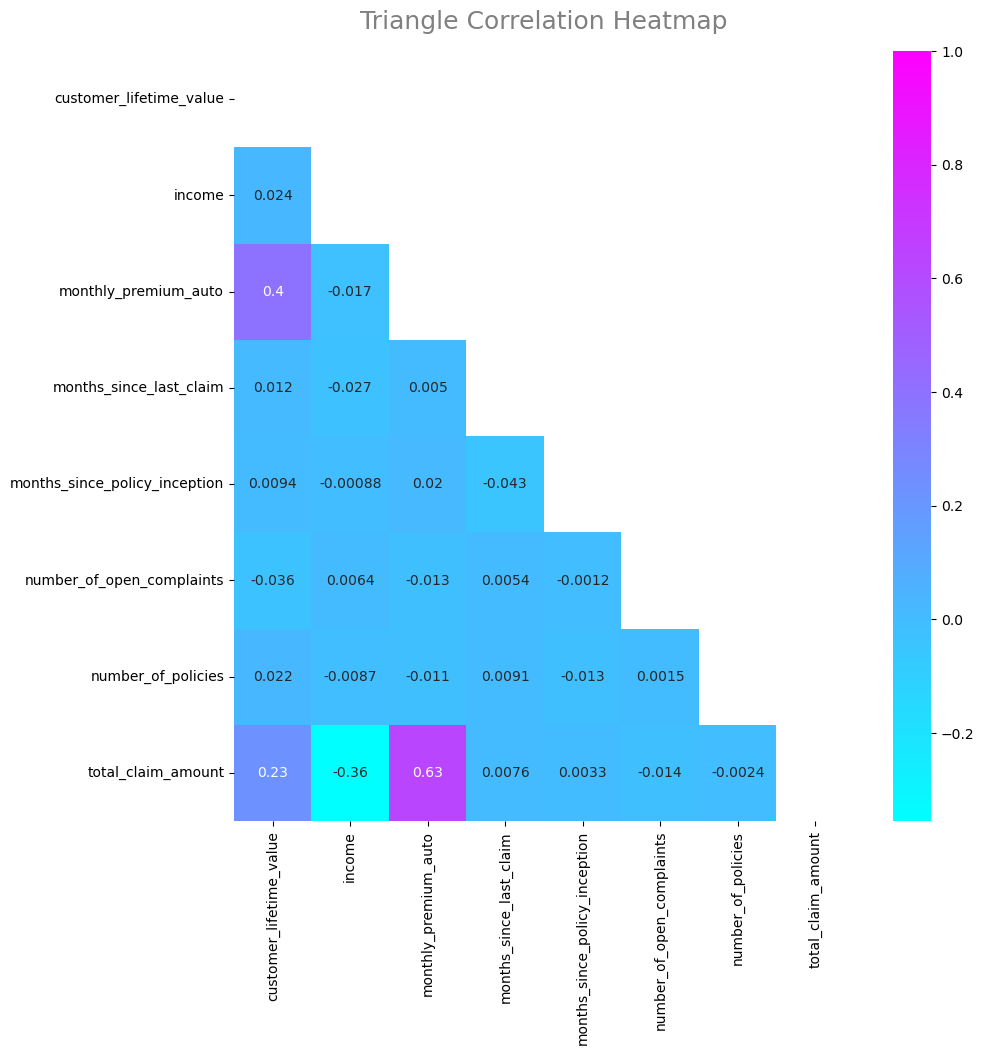

In [54]:
plt.figure(figsize=(10,10))
mascara=np.triu(np.ones_like(numerical.corr(), dtype=np.bool)) # aislar el triángulo superior de una matriz mientras convierte todos los valores en el triángulo inferior en 
heatmap = sns.heatmap(numerical.corr(), mask=mascara, vmax=1, annot=True, cmap='cool') #podemos establecer el valor maximo y minimo
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16, color='grey')

#Podemos observar que todas las variables tienen una correlacion baja a  moderada, por lo que no sera necesario eliminar columnas

<font color='orange'> Identificamos nuestras columnas con nulos y remplazamos con la  media </font>

In [55]:
numerical.isnull().sum()
# Nuestras variables numericas no contienen nulos

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
dtype: int64

<font color='orange'>Separamos entre lo que son Features/Características y lo que es mi objetivo/target/</font>

In [56]:
y=numerical['total_claim_amount']
X_num=numerical.drop(['total_claim_amount'], axis=1)

<font color='orange'> Graficamos nuestras variables numericas </font>

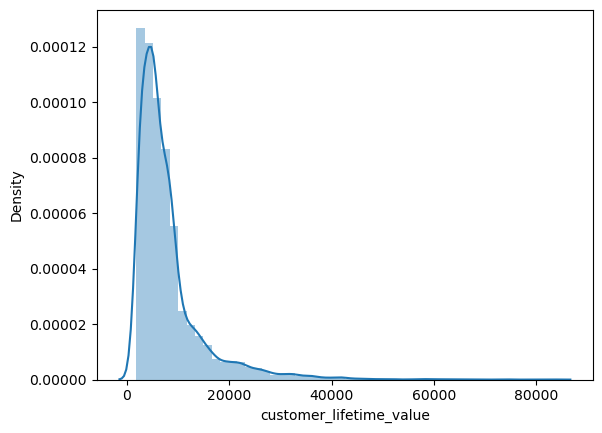

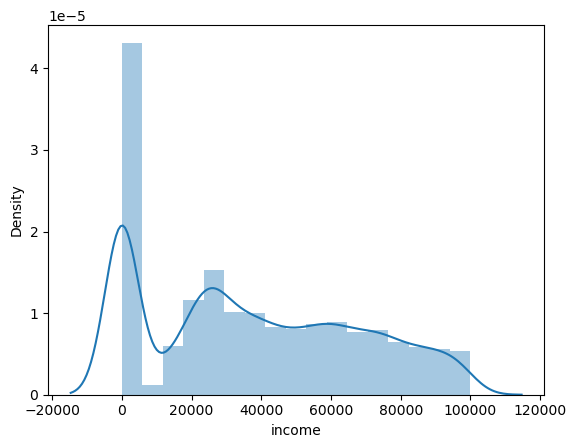

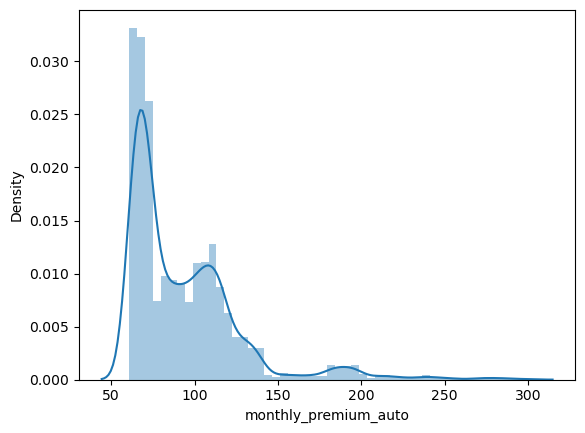

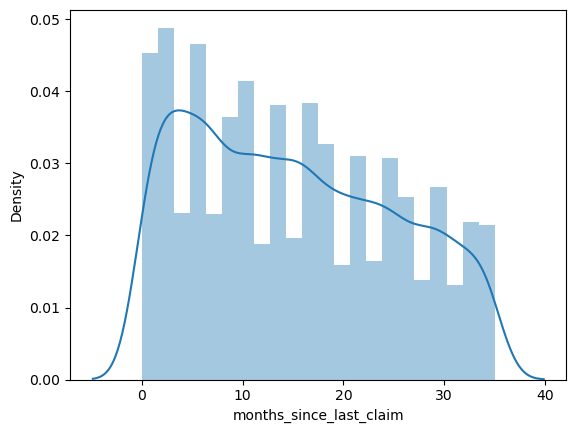

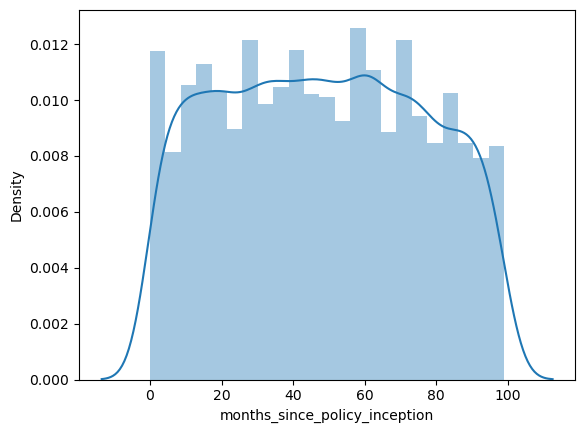

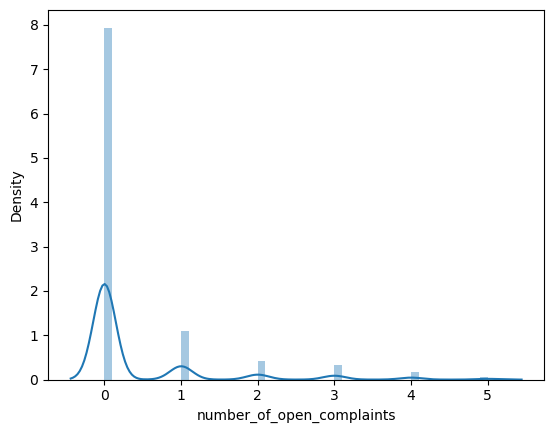

In [57]:
for i in range(6):
    sns.distplot(X_num.iloc[:,i])
    plt.show()

<font color='orange'> Normalizamos las columnas </font>

In [58]:
from sklearn.preprocessing import Normalizer
transformer=Normalizer().fit(X_num)
X_num1=transformer.transform(X_num)

data_norm=pd.DataFrame(X_num1) 

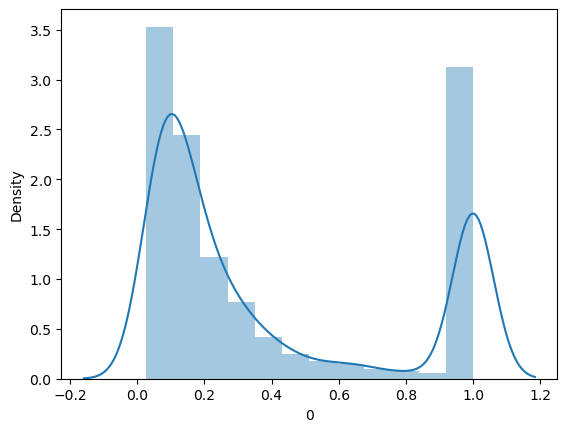

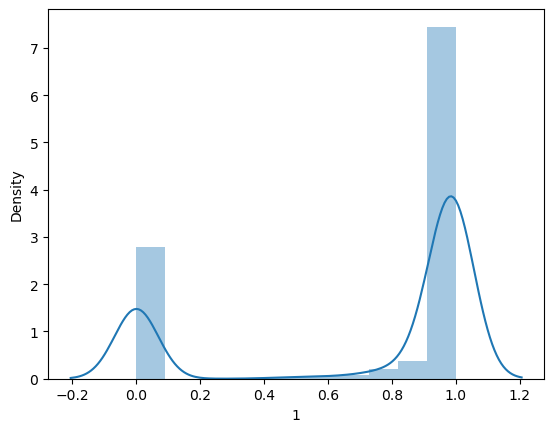

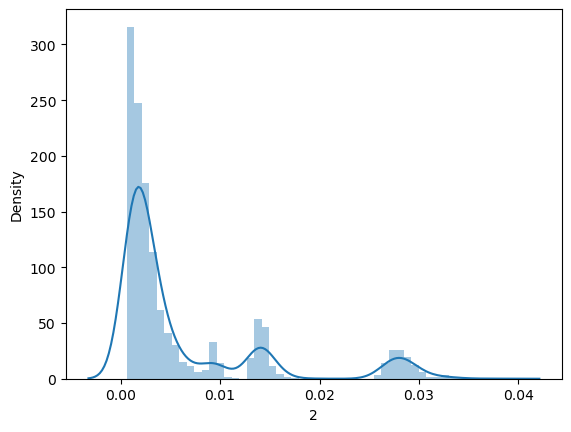

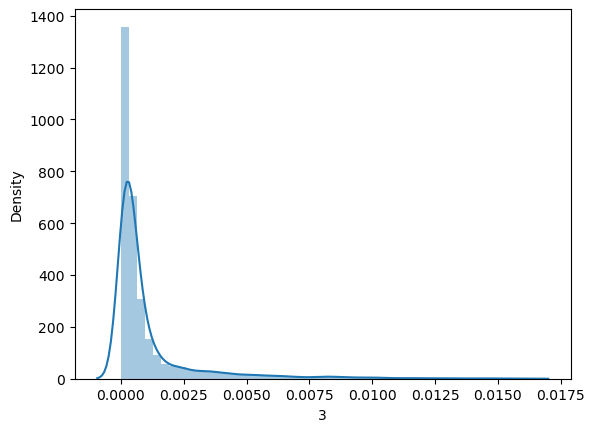

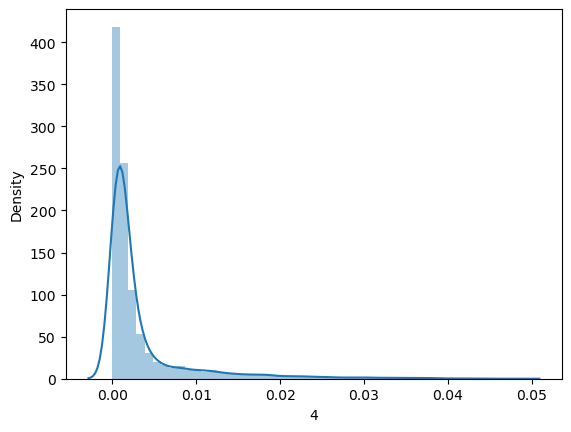

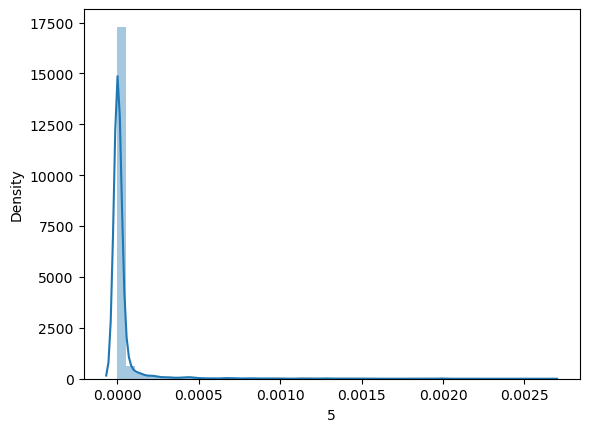

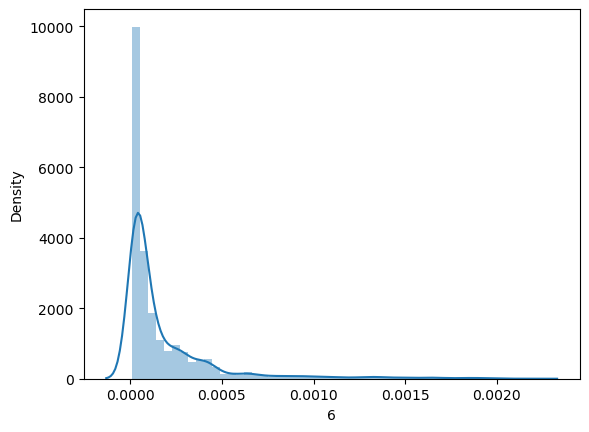

In [59]:
for i in range(7):
    sns.distplot(data_norm.iloc[:,i])
    #cuando queremos que en un momento dado ya nos de el output de la grafica, debemos poner el plt.show(), ssi no, me empalma las graficas
    plt.show()

<font color='orange'> Trabajamos con nuestras Categoricas </font>

In [60]:
categorical = data.select_dtypes(include='object')
categorical

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,02/03/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,02/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,02/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,02/06/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,02/03/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [61]:
categorical.isnull().sum()
# No tenemos valores nulos en nuestros datos categoricos

customer             0
state                0
response             0
coverage             0
education            0
effective_to_date    0
employmentstatus     0
gender               0
location_code        0
marital_status       0
policy_type          0
policy               0
renew_offer_type     0
sales_channel        0
vehicle_class        0
vehicle_size         0
dtype: int64

<font color='orange'> Extraemos los meses de la columna effective to date y eliminamos esa columna </font>

In [62]:
categorical['effective_to_date'].unique


<bound method Series.unique of 0        2/24/11
1        1/31/11
2        2/19/11
3        1/20/11
4       02/03/11
          ...   
9129    02/10/11
9130    02/12/11
9131    02/06/11
9132    02/03/11
9133     2/14/11
Name: effective_to_date, Length: 9134, dtype: object>

In [63]:
type(categorical['effective_to_date'])

pandas.core.series.Series

In [64]:
categorical['month'] = pd.to_datetime(categorical['effective_to_date'], format='%m/%d/%y').dt.month_name().str.slice(stop=3)

In [65]:
categorical=categorical.drop(['effective_to_date'],axis=1)
categorical

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,month
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,Feb
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,Jan
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,Feb
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,Jan
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,Feb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize,Feb
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize,Feb
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize,Feb
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large,Feb


<font color='orange'> Ordenaremos nuestras columnas por Mes, pero le diremos que no es Ascendente, para que Enero quede hasta arriba </font>

In [66]:
# Aqui no se por que si le pongo solo ordenar, me pone a Febrero primero, y entonces en mi grafica me sale Febrero, Enero 


In [67]:
categorical=categorical.sort_values(by='month', ascending=False)

<font color='orange'> Eliminaremos la columna de customer por que no aporta nada a nuestro analisis </font>

In [68]:
categorical=categorical.drop(['customer'],axis=1)
categorical

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,month
3115,Arizona,No,Extended,High School or Below,Employed,M,Rural,Divorced,Personal Auto,Personal L1,Offer1,Call Center,Four-Door Car,Medsize,Jan
7311,Oregon,No,Premium,Bachelor,Employed,F,Rural,Married,Personal Auto,Personal L1,Offer2,Agent,Four-Door Car,Medsize,Jan
3914,California,No,Basic,College,Employed,M,Rural,Divorced,Personal Auto,Personal L3,Offer2,Web,SUV,Small,Jan
3913,Oregon,Yes,Extended,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L1,Offer2,Agent,SUV,Small,Jan
3912,Arizona,Yes,Basic,College,Retired,F,Suburban,Married,Personal Auto,Personal L3,Offer2,Branch,Two-Door Car,Large,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4176,Oregon,No,Extended,College,Unemployed,M,Suburban,Single,Personal Auto,Personal L1,Offer1,Agent,SUV,Medsize,Feb
4173,Washington,No,Basic,College,Employed,F,Rural,Divorced,Special Auto,Special L2,Offer2,Agent,Four-Door Car,Medsize,Feb
4172,Oregon,No,Basic,College,Disabled,F,Suburban,Married,Personal Auto,Personal L1,Offer2,Branch,Four-Door Car,Medsize,Feb
4163,Arizona,No,Extended,High School or Below,Employed,M,Urban,Divorced,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize,Feb


<font color='orange'> Graficamos nuestras Categoricas </font>

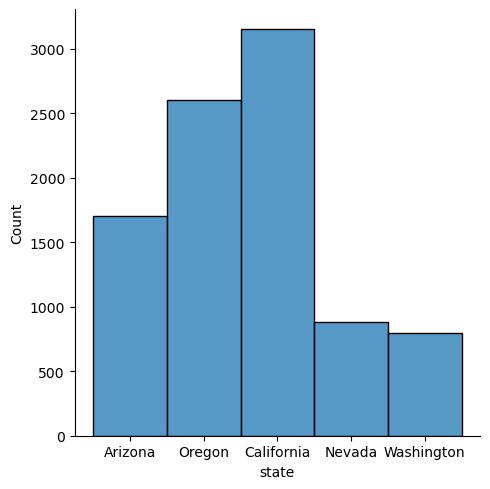

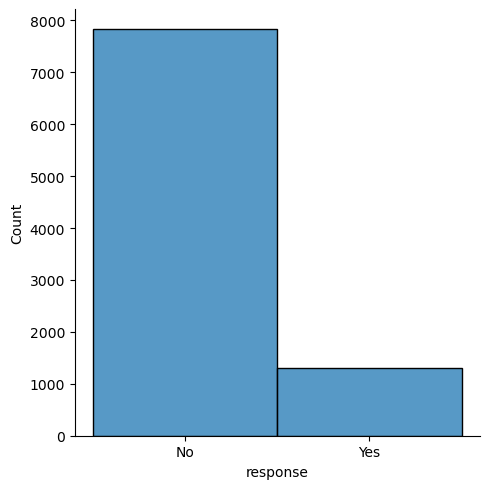

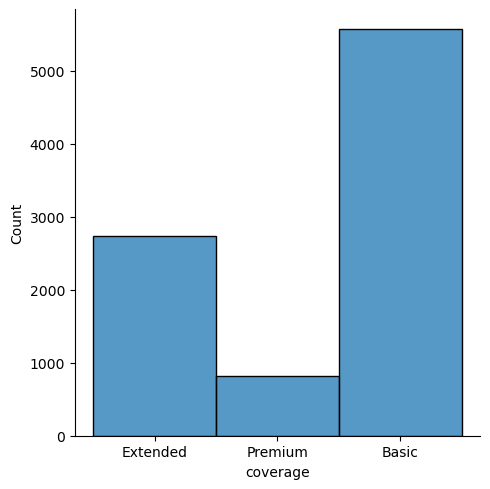

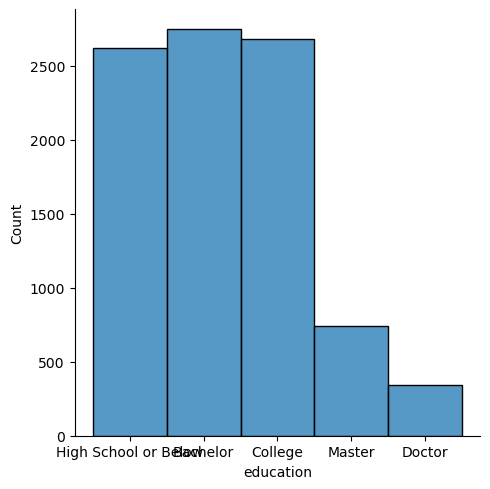

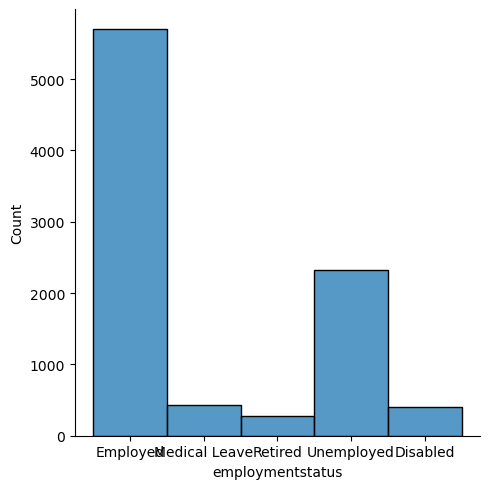

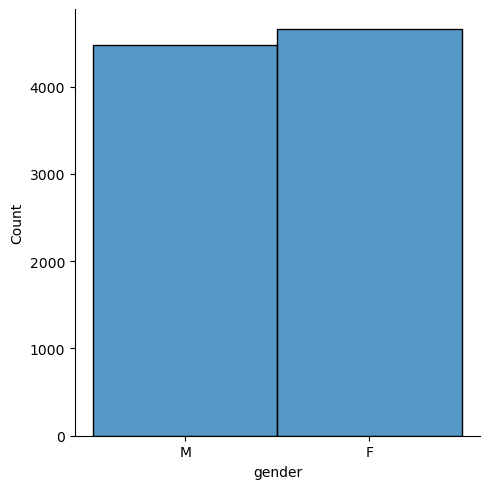

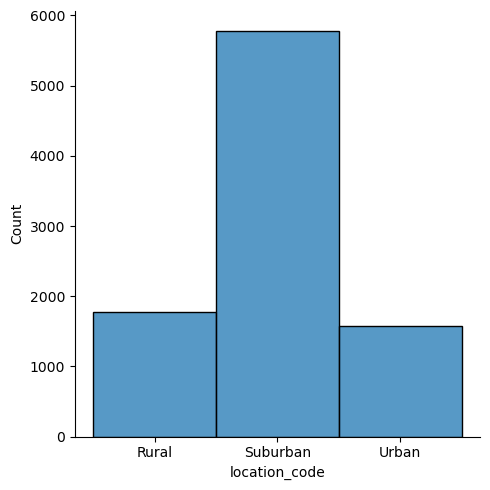

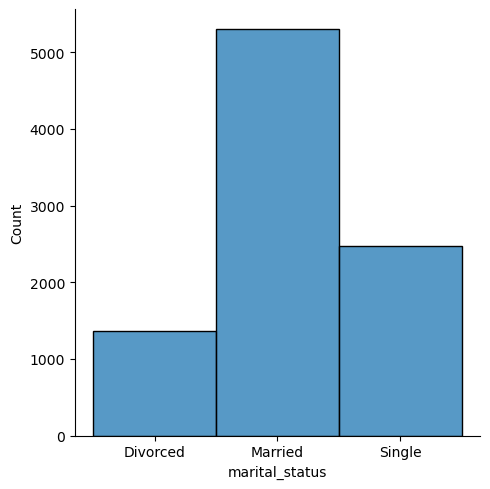

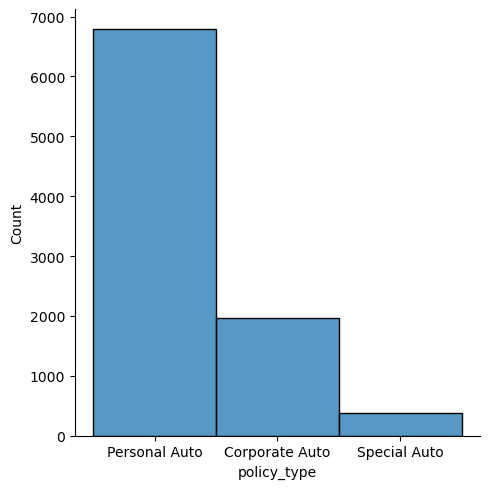

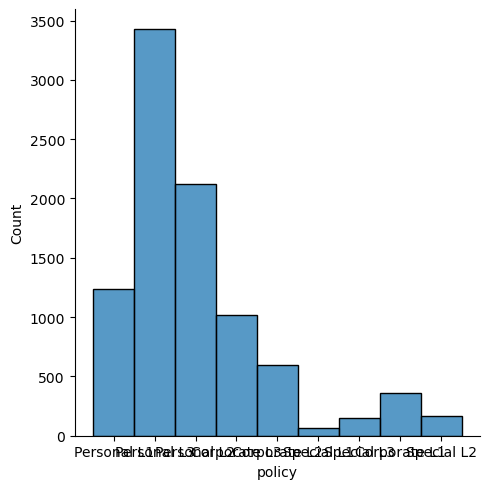

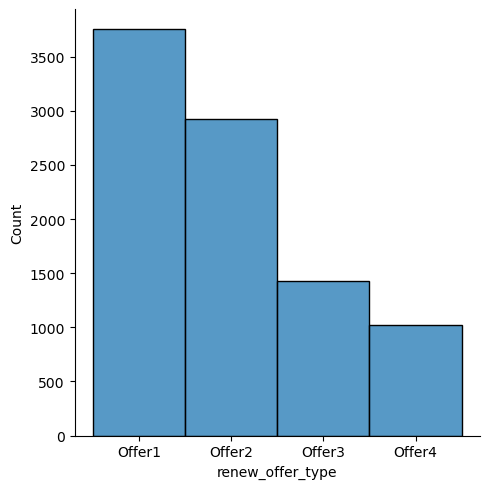

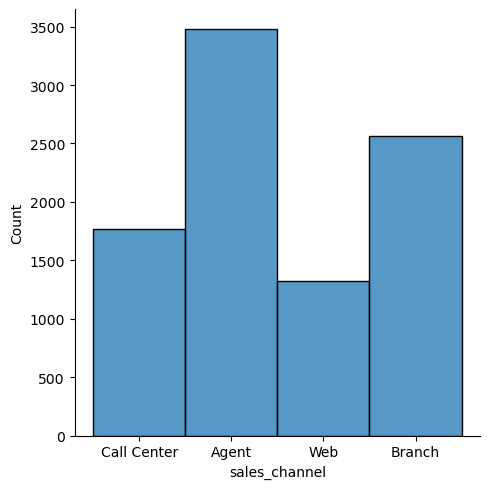

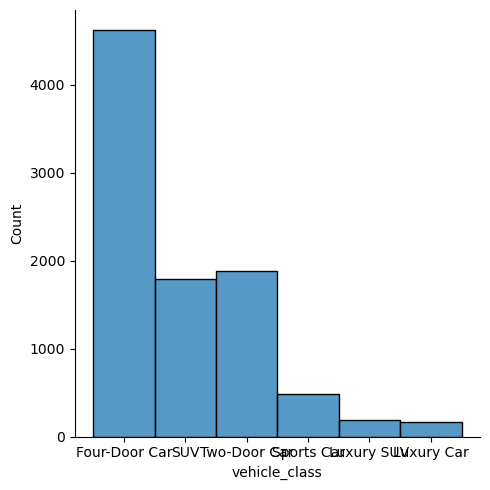

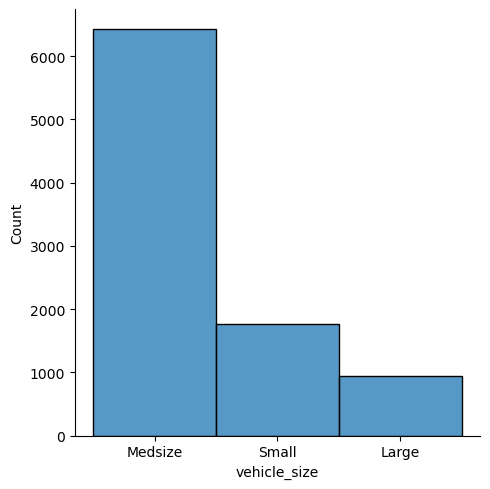

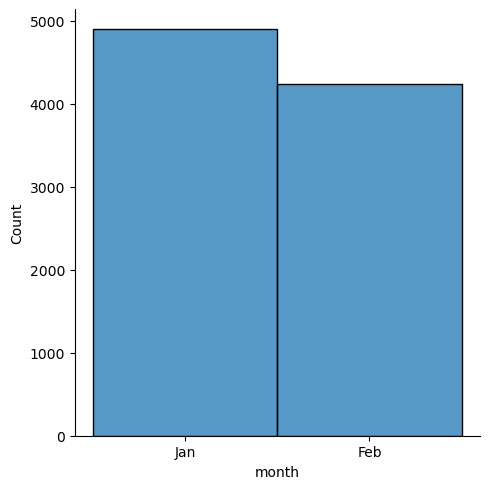

In [69]:
for i in categorical.columns:
  sns.displot(categorical[i])

<font color='orange'> Aplicamos el label encoder </font>

In [70]:
from sklearn import preprocessing
categorical=categorical.apply(preprocessing.LabelEncoder().fit_transform)
categorical

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,month
3115,0,0,1,3,1,1,0,0,1,3,0,2,0,1,1
7311,3,0,2,0,1,0,0,1,1,3,1,0,0,1,1
3914,1,0,0,1,1,1,0,0,1,5,1,3,3,2,1
3913,3,1,1,0,2,0,1,1,1,3,1,0,3,2,1
3912,0,1,0,1,3,0,1,1,1,5,1,1,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4176,3,0,1,1,4,1,1,2,1,3,0,0,3,1,0
4173,4,0,0,1,1,0,0,0,2,7,1,0,0,1,0
4172,3,0,0,1,0,0,1,1,1,3,1,1,0,1,0
4163,0,0,1,3,1,1,2,0,1,5,1,3,5,1,0


<font color='orange'> Concatenamos las variables numericas y categoricas </font>

In [71]:
X=np.concatenate((data_norm,categorical),axis=1)
X.shape

(9134, 22)

# <font color='orange'>  Entrenamos nuestro modelo </font>

In [72]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=1)

<font color='orange'> Aplicamos la Regresion lineal</font>

In [73]:
lm=linear_model.LinearRegression()

In [74]:
model=lm.fit(X_train,y_train)

<font color='orange'> Obtenemos las predicciones y Obtenemos R^2 y Errores Cuadraticos Medios </font>

In [75]:
predictions=lm.predict(X_test)

In [76]:
r2_score(y_test,predictions)

0.26045174322999565

In [77]:
mse=mean_squared_error(y_test,predictions)
print(mse)

57164.08043538695


In [78]:
predictions=lm.predict(X_train)
r2_score(y_train,predictions)

0.25554417767905446

In [79]:
mse=mean_squared_error(y_train,predictions)
print(mse)

65054.5769055843


<font color='orange'>Podemos observar que nuestro modelo es malo, por lo que intentaremos en vez de normalizar, estandarizar los datos  </font>


<font color='cyan'> Normalizamos las columnas </font>

In [80]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_num2=scale.fit_transform(X_num)
data_standard=pd.DataFrame(X_num2) 

<font color='cyan'> Concatenamos las variables numericas y categoricas </font>

In [81]:
X2=np.concatenate((data_standard,categorical),axis=1)
X2.shape

(9134, 22)

<font color='cyan'>  Entrenamos nuestro modelo </font>

In [82]:
X_train,X_test,y_train,y_test=train_test_split(X2,y,test_size=0.3, random_state=1)

<font color='cyan'> Aplicamos la Regresion lineal</font>

In [83]:
lm=linear_model.LinearRegression()

In [84]:
model=lm.fit(X_train,y_train)

<font color='cyan'> Obtenemos las predicciones y Obtenemos R^2 y Errores Cuadraticos Medios </font>

In [85]:
predictions=lm.predict(X_test)

In [86]:
r2_score(y_test,predictions)

0.5149068441050468

In [87]:
mse=mean_squared_error(y_test,predictions)
print(mse)

37495.73327823915


In [88]:
predictions=lm.predict(X_train)
r2_score(y_train,predictions)

0.5208252460143472

In [89]:
mse=mean_squared_error(y_train,predictions)
print(mse)

41872.88211030362


<font color='cyan'>Nuestro modelo mejoro (pasamos de un 0.25 a un 0.51 en r^2), pero aun no es lo suficientemente bueno  </font>

<font color='magenta'>Ahora intentaremos usar la regresion de ridge y lasso   </font>

In [90]:
from sklearn import linear_model
ridge = linear_model.Ridge(alpha=10)
ridge.fit(X_train,y_train)

Ridge(alpha=10)

In [91]:
training_ridge = ridge.score(X_train,y_train)
print("training accuracy with ridge ",training_ridge )

training accuracy with ridge  0.5208237825723994


In [92]:
accuracy_lasso = ridge.score(X_test,y_test)
print("accuracy with lasso: ",accuracy_lasso)

accuracy with lasso:  0.5149539267224621


<font color='magenta'> Nuestro modelo mejoro pero minimamente con la regresion de Ridge  </font>

<font color='Green'> Intentaremos con la transformacion BoxCox </font>

In [93]:
#Para aplicar boxcox mi data tiene que ser positiva, por lo que la columna income, todos los valores negativos o cero  los reemplazare con la media

In [94]:
income_mean=X_num['income'].mean()
mslc_mean=X_num['months_since_last_claim'].mean()
mspi_mean=X_num['months_since_policy_inception'].mean()
nooc_mean=X_num['number_of_open_complaints'].mean()
X_num['income']=X_num['income'].replace(0,income_mean)
X_num['months_since_last_claim']=X_num['months_since_last_claim'].replace(0,mslc_mean)
X_num['months_since_policy_inception']=X_num['months_since_policy_inception'].replace(0,mspi_mean)
X_num['number_of_open_complaints']=X_num['number_of_open_complaints'].replace(0,nooc_mean)

In [95]:
from scipy import stats
a,lmbda1=stats.boxcox(X_num['customer_lifetime_value'])
b,lmbda2=stats.boxcox(X_num['income'])
c,lmbda3=stats.boxcox(X_num['monthly_premium_auto'])
d,lmbda4=stats.boxcox(X_num['months_since_last_claim'])
e,lmbda5=stats.boxcox(X_num['months_since_policy_inception'])
f,lmbda6=stats.boxcox(X_num['number_of_open_complaints'])
g,lmbda7=stats.boxcox(X_num['number_of_policies'])


In [96]:
Lambda = [lmbda1,
          lmbda2,
          lmbda3,
          lmbda4,
          lmbda5,
          lmbda6,
          lmbda7,

         ]


a = pd.Series(a)
b = pd.Series(b)
c = pd.Series(c)
d = pd.Series(d)
e = pd.Series(e)
f = pd.Series(f)
g = pd.Series(g)


data_boxcox = pd.concat([a,b,c,d,e,f,g],axis=1)


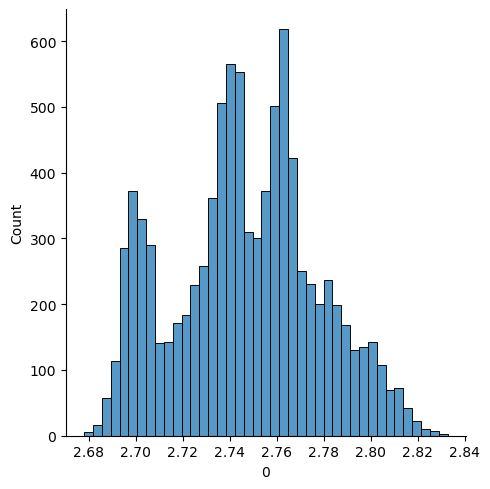

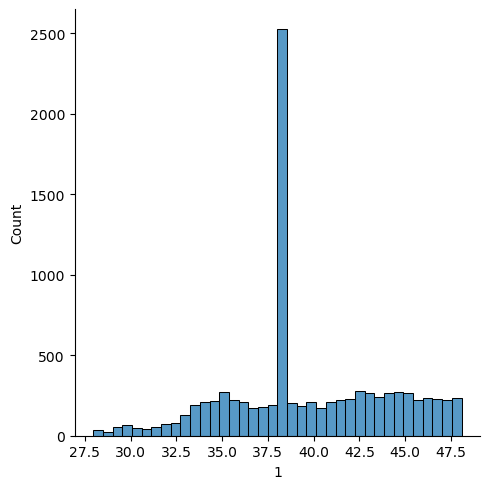

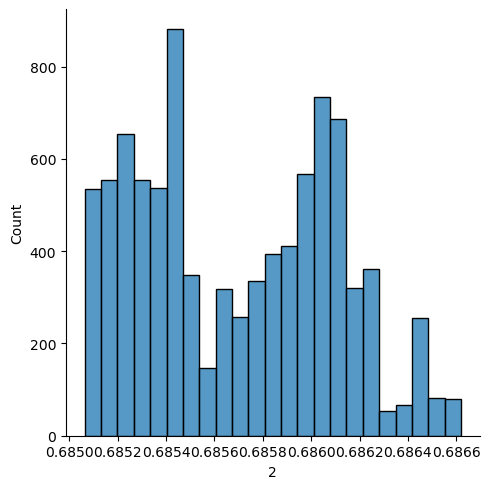

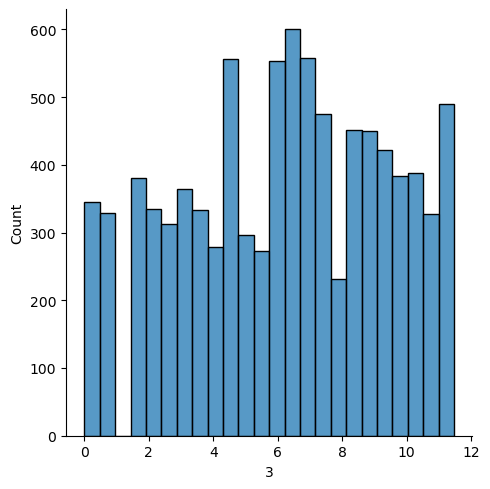

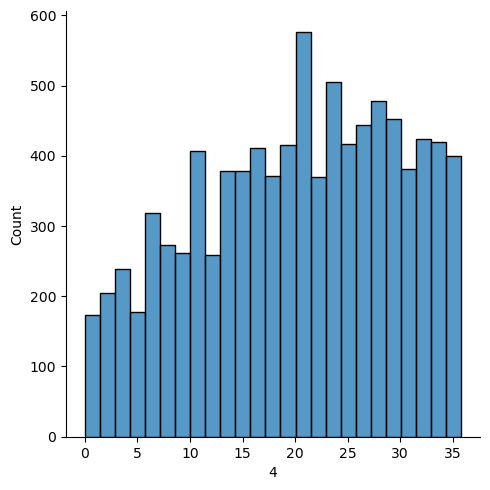

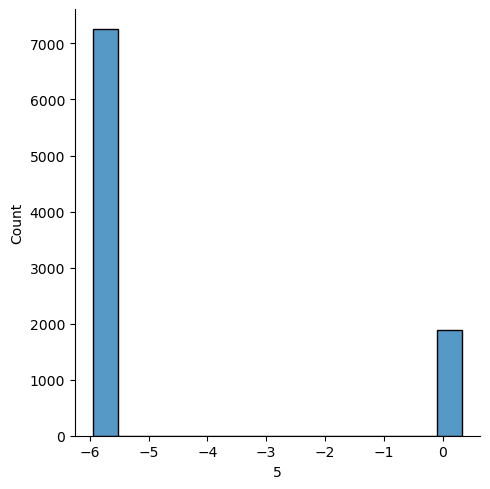

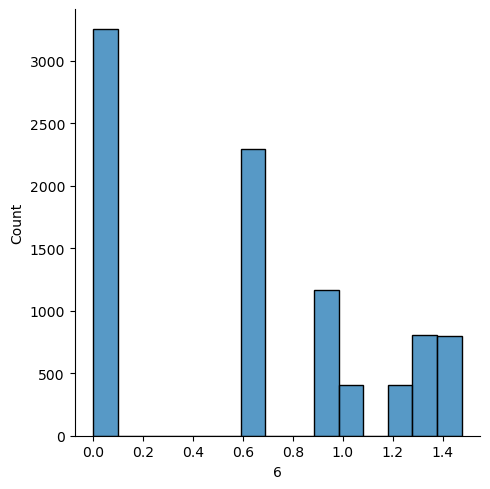

In [97]:
for i in data_boxcox.columns:
  sns.displot(data_boxcox[i])

<font color='green'> Concatenamos las variables numericas y categoricas </font>

In [98]:
X3=np.concatenate((data_boxcox,categorical),axis=1)
X3.shape

(9134, 22)

<font color='green'>  Entrenamos nuestro modelo </font>

In [99]:
X_train,X_test,y_train,y_test=train_test_split(X3,y,test_size=0.3, random_state=1)

<font color='green'> Aplicamos la Regresion lineal</font>

In [100]:
lm=linear_model.LinearRegression()

In [101]:
model=lm.fit(X_train,y_train)

<font color='green'> Obtenemos las predicciones y Obtenemos R^2 y Errores Cuadraticos Medios </font>

In [102]:
predictions=lm.predict(X_test)

In [103]:
r2_score(y_test,predictions)

0.3390307221808567

In [104]:
mse=mean_squared_error(y_test,predictions)
print(mse)

51090.244100627584


In [105]:
predictions=lm.predict(X_train)
r2_score(y_train,predictions)

0.35145195009082797

In [106]:
mse=mean_squared_error(y_train,predictions)
print(mse)

56673.63693690585


# <font color='green'> Conclusion </font>

Nos quedamos con nuestro modelo de estandarizar o con nuestro regresion lineal de Ridge
Sin embargo aun hay que buscar otra manera de acercarnos mas a la distribucion normal 